In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, X_train, y_train, X_test, y_test):
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, pred))
    
    fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [3]:
df_cust_airlines = pd.read_csv('Invistico_Airline.csv', sep=',')
df_cust_airlines.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# Data Preprocessing

In [4]:
df_cust_airlines_copy_1 = df_cust_airlines.copy() #ini onehot encoding
df_cust_airlines_encode = df_cust_airlines.copy() #ini encoding biasa

In [5]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df_cust_airlines_encode)}')

filtered_entries = np.array([True] * len(df_cust_airlines_encode))
for col in ['Flight Distance']:
    zscore = abs(stats.zscore(df_cust_airlines_encode[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df_cust_airlines_encode = df_cust_airlines_encode[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_cust_airlines_encode)}')

Jumlah baris sebelum memfilter outlier: 129880
Jumlah baris setelah memfilter outlier: 129050


In [6]:
df_cust_airlines_encode['Departure Delay in Minutes'] = df_cust_airlines_encode['Departure Delay in Minutes'].apply(lambda x: 1 if x > 0  else 0) # 1 sama dengan telat
df_cust_airlines_encode['Arrival Delay in Minutes'] = df_cust_airlines_encode['Arrival Delay in Minutes'].apply(lambda x: 1 if x > 0  else 0) # 1 sama dengan telat

In [7]:
data_encod_satisfaction=pd.get_dummies(df_cust_airlines_encode['satisfaction'], prefix='Yes')
data_encod_gender=pd.get_dummies(df_cust_airlines_encode['Gender'], prefix='Gender')
data_encod_cust_type=pd.get_dummies(df_cust_airlines_encode['Customer Type'], prefix='Type')
data_encod_travel_type=pd.get_dummies(df_cust_airlines_encode['Type of Travel'], prefix='Yes')
data_encod_class=pd.get_dummies(df_cust_airlines_encode['Class'],prefix = 'Class')

In [8]:
onehot_data = pd.concat([df_cust_airlines_encode, data_encod_satisfaction, data_encod_gender, data_encod_cust_type, data_encod_travel_type, data_encod_class], axis = 1)

In [9]:
df_cust_airlines_encode['Arrival Delay in Minutes'] = df_cust_airlines_encode['Arrival Delay in Minutes'].fillna(df_cust_airlines_encode['Arrival Delay in Minutes'].median())  

In [10]:
df_cust_airlines_copy_1['Arrival Delay in Minutes'] = df_cust_airlines_copy_1['Arrival Delay in Minutes'].fillna(df_cust_airlines_copy_1['Arrival Delay in Minutes'].median())  

In [11]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df_cust_airlines_copy_1)}')

filtered_entries = np.array([True] * len(df_cust_airlines_copy_1))
for col in ['Flight Distance']:
    zscore = abs(stats.zscore(df_cust_airlines_copy_1[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df_cust_airlines_copy_1 = df_cust_airlines_copy_1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_cust_airlines_copy_1)}')

Jumlah baris sebelum memfilter outlier: 129880
Jumlah baris setelah memfilter outlier: 129050


In [12]:
df_cust_airlines_copy_1['Departure Delay in Minutes'] = df_cust_airlines_copy_1['Departure Delay in Minutes'].apply(lambda x: 1 if x > 0  else 0) # 1 sama dengan telat
df_cust_airlines_copy_1['Arrival Delay in Minutes'] = df_cust_airlines_copy_1['Arrival Delay in Minutes'].apply(lambda x: 1 if x > 0  else 0) # 1 sama dengan telat

# One-Hot Encoding

In [13]:
data_encod_satisfaction=pd.get_dummies(df_cust_airlines_copy_1['satisfaction'], prefix='Yes')
data_encod_gender=pd.get_dummies(df_cust_airlines_copy_1['Gender'], prefix='Gender')
data_encod_cust_type=pd.get_dummies(df_cust_airlines_copy_1['Customer Type'], prefix='Type')
data_encod_travel_type=pd.get_dummies(df_cust_airlines_copy_1['Type of Travel'], prefix='Yes')
data_encod_class=pd.get_dummies(df_cust_airlines_copy_1['Class'],prefix = 'Class')

In [14]:
onehot_data = pd.concat([df_cust_airlines_copy_1, data_encod_satisfaction, data_encod_gender, data_encod_cust_type, data_encod_travel_type, data_encod_class], axis = 1)

In [15]:
df_cust_airlines_encode = onehot_data.copy()
df_cust_airlines_encode['satisfaction_encode'] = df_cust_airlines_encode['satisfaction'].apply(lambda x: 1 if x == 'satisfied'  else 0) # 1 sama dengan satisfied
df_cust_airlines_encode['gender_encode'] = df_cust_airlines_encode['Gender'].apply(lambda x: 1 if x == 'Male'  else 0) # 1 sama dengan laki-laki
df_cust_airlines_encode.reset_index(drop=True).head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Gender_Male,Type_Loyal Customer,Type_disloyal Customer,Yes_Business travel,Yes_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_encode,gender_encode
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,1,1,0,0,1,1,0,0,1,1
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,0,1,0,0,1,0,1,0,1,0


# Modelling

In [16]:
rf_model=onehot_data.copy()
rf_model['satisfaction_encode'] = rf_model['satisfaction'].apply(lambda x: 1 if x == 'satisfied'  else 0) # 1 sama dengan satisfied
rf_model['gender_encode'] = rf_model['Gender'].apply(lambda x: 1 if x == 'Male'  else 0) # 1 sama dengan laki-laki
rf_model.reset_index(drop=True).head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Gender_Male,Type_Loyal Customer,Type_disloyal Customer,Yes_Business travel,Yes_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_encode,gender_encode
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,1,1,0,0,1,1,0,0,1,1
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,0,1,0,0,1,0,1,0,1,0


# Split Feature dan Label

In [17]:
X = rf_model.drop(columns=['satisfaction','satisfaction_encode','Yes_satisfied','Yes_dissatisfied','Customer Type','Type of Travel','Class','Gender','Gender_Female','Gender_Male','Type_Loyal Customer','Type_disloyal Customer','Yes_Business travel','Yes_Personal Travel'])
y = rf_model['satisfaction_encode'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# RandomForestClassification

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.96
Recall (Test Set): 0.93
F1-Score (Test Set): 0.94
AUC: 0.94


# RandomForestClassification Hyperparameters Tuning

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.ensemble import RandomForestClassifier

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       criterion = ['gini','entropy'],
                       max_features = ['auto', 'sqrt', 'log2'] # Jumlah feature yg dipertimbangkan pada masing-masing split
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5)
rf_tuned.fit(X_train, y_train)

# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)
y_proba = rf_tuned.predict_proba(X_test)
y_proba = y_proba[:,1]
eval_classification(rf_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.96
Recall (Test Set): 0.93
F1-Score (Test Set): 0.94
AUC: 0.94


# XG Boost

In [21]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42, eval_metric='mlogloss')
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.96
Recall (Test Set): 0.95
F1-Score (Test Set): 0.95
AUC: 0.95


# XGBoost feature importance

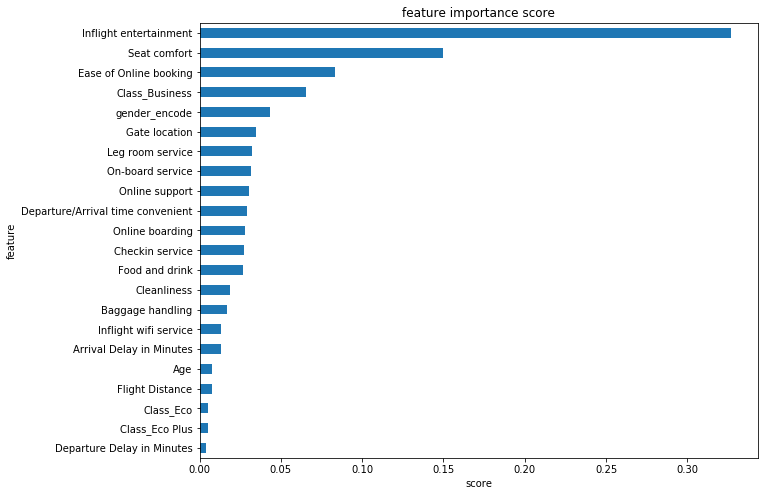

In [22]:
show_feature_importance(xg)

> XGBoost most importance feature :
    - Inflight Entertainment
    - Seat Comfort
    - Ease of Online Booking

# XGBoost Hyperparameters Tuning

In [23]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42, eval_metric='mlogloss')
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42)
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned.predict(X_test)#Check performa dari model
eval_classification(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.96
Recall (Test Set): 0.95
F1-Score (Test Set): 0.95
AUC: 0.95


# Trained Score

In [24]:
print('Train score : ' + str(xg_tuned.score(X_train, y_train)))
print('Test score : ' + str(xg_tuned.score(X_test, y_test)))

Train score : 0.9973764321691482
Test score : 0.9501226914632571


# Surveyed Feature Impact Modelling

In [25]:
data_filter_ekonomi= df_cust_airlines_encode[df_cust_airlines_encode['Class_Eco']==1]
data_filter_business= df_cust_airlines_encode[df_cust_airlines_encode['Class_Business']==1]
data_filter_ecoplus= df_cust_airlines_encode[df_cust_airlines_encode['Class_Eco Plus']==1]

In [26]:
data_test_eco=data_filter_ekonomi.copy()
data_test_ecoplus=data_filter_ecoplus.copy()
data_test_business=data_filter_business.copy()

# Eco Survey Impact Modelling

In [27]:
data_test_eco_1_rand=data_test_eco.drop(columns=['satisfaction','satisfaction_encode','Yes_satisfied','Yes_dissatisfied',
                                            'Customer Type','Type of Travel','Class','Gender','Gender_Female','Gender_Male',
                                            'Type_Loyal Customer','Type_disloyal Customer','Yes_Business travel','Yes_Personal Travel'])

In [28]:
data_test_eco_1_rand['Food and drink'].median()

3.0

In [29]:
data_test_eco_1_rand['Seat comfort'].median()

3.0

In [30]:
data_test_eco_1_rand['Gate location'].median()

3.0

In [31]:
data_test_eco_1_rand['Food and drink']=data_test_eco_1_rand['Food and drink'].apply(lambda x : 4 if x < 4 else x)
data_test_eco_1_rand['Seat comfort']=data_test_eco_1_rand['Seat comfort'].apply(lambda x : 4 if x < 4 else x)
data_test_eco_1_rand['Gate location']=data_test_eco_1_rand['Gate location'].apply(lambda x : 4 if x < 4 else x)

In [32]:
y_pred_eco_rand = xg_tuned.predict(data_test_eco_1_rand)#Check performa dari model
y_proba_eco_rand = xg_tuned.predict_proba(data_test_eco_1_rand)

In [33]:
y_pred_eco_rand=pd.DataFrame(y_pred_eco_rand.tolist())

In [34]:
data_test_eco_2_rand=data_test_eco_1_rand.reset_index(drop=True)

In [35]:
data_test_eco_2_rand['satisfaction']=y_pred_eco_rand

In [36]:
data_test_eco_2_rand['satisfaction'].value_counts()

1    34809
0    23460
Name: satisfaction, dtype: int64

In [37]:
data_test_eco['satisfaction'].value_counts()

dissatisfied    35302
satisfied       22967
Name: satisfaction, dtype: int64

In [38]:
((34809-22967)/22967)*100

51.56093525493098

> Dengan mengubah 3 feature sesuai survey persentase Satisfied penumpang kelas Economy naik sebesar 51%

# Business Survey Impact Modelling

In [39]:
data_test_bus_1_rand=data_test_business.drop(columns=['satisfaction','satisfaction_encode','Yes_satisfied','Yes_dissatisfied',
                                                 'Customer Type','Type of Travel','Class','Gender','Gender_Female','Gender_Male',
                                                 'Type_Loyal Customer','Type_disloyal Customer','Yes_Business travel','Yes_Personal Travel'])

In [40]:
data_test_bus_1_rand['Seat comfort'].median()

3.0

In [41]:
data_test_bus_1_rand['Departure/Arrival time convenient'].median()

3.0

In [42]:
data_test_bus_1_rand['Food and drink'].median()

3.0

In [43]:
data_test_bus_1_rand['Seat comfort']=data_test_bus_1_rand['Seat comfort'].apply(lambda x : 4 if x < 4 else x)
data_test_bus_1_rand['Departure/Arrival time convenient']=data_test_bus_1_rand['Departure/Arrival time convenient'].apply(lambda x : 4 if x < 4 else x)
data_test_bus_1_rand['Food and drink']=data_test_bus_1_rand['Food and drink'].apply(lambda x : 4 if x < 4 else x)

In [44]:
y_pred_bus_rand = xg_tuned.predict(data_test_bus_1_rand)#Check performa dari model
y_proba_bus_rand = xg_tuned.predict_proba(data_test_bus_1_rand)

In [45]:
y_pred_bus_rand=pd.DataFrame(y_pred_bus_rand.tolist())

In [46]:
data_test_bus_2_rand=data_test_bus_1_rand.reset_index(drop=True)

In [47]:
data_test_bus_2_rand['satisfaction']=y_pred_bus_rand

In [48]:
data_test_bus_2_rand['satisfaction'].value_counts()

1    45715
0    15663
Name: satisfaction, dtype: int64

In [49]:
data_test_business['satisfaction'].value_counts()

satisfied       43563
dissatisfied    17815
Name: satisfaction, dtype: int64

In [50]:
((45715-43563)/43563)*100

4.939971994582558

> Dengan mengubah 3 feature sesuai survey persentase Satisfied penumpang kelas Business naik sebesar 4.9%

# Eco Plus Survey Impact Modelling

In [51]:
data_test_ecoplus_1_rand=data_test_ecoplus.drop(columns=['satisfaction','satisfaction_encode','Yes_satisfied','Yes_dissatisfied',
                                                    'Customer Type','Type of Travel','Class','Gender','Gender_Female','Gender_Male',
                                                    'Type_Loyal Customer','Type_disloyal Customer','Yes_Business travel','Yes_Personal Travel'])

In [52]:
data_test_ecoplus_1_rand['Food and drink'].median()

3.0

In [53]:
data_test_ecoplus_1_rand['Seat comfort'].median()

3.0

In [54]:
data_test_ecoplus_1_rand['Gate location'].median()

3.0

In [55]:
data_test_ecoplus_1_rand['Food and drink']=data_test_ecoplus_1_rand['Food and drink'].apply(lambda x : 4 if x < 4 else x)
data_test_ecoplus_1_rand['Seat comfort']=data_test_ecoplus_1_rand['Seat comfort'].apply(lambda x : 4 if x < 4 else x)
data_test_ecoplus_1_rand['Gate location']=data_test_ecoplus_1_rand['Gate location'].apply(lambda x : 4 if x < 4 else x)

In [56]:
y_pred_ecoplus_rand = xg_tuned.predict(data_test_ecoplus_1_rand)#Check performa dari model
y_proba_ecoplus_rand = xg_tuned.predict_proba(data_test_ecoplus_1_rand)

In [57]:
y_pred_ecoplus_rand=pd.DataFrame(y_pred_ecoplus_rand.tolist())

In [58]:
data_test_ecoplus_2_rand=data_test_ecoplus_1_rand.reset_index(drop=True)

In [59]:
data_test_ecoplus_2_rand['satisfaction']=y_pred_ecoplus_rand

In [60]:
data_test_ecoplus_2_rand['satisfaction'].value_counts()

1    5166
0    4237
Name: satisfaction, dtype: int64

In [61]:
data_test_ecoplus['satisfaction'].value_counts()

dissatisfied    5387
satisfied       4016
Name: satisfaction, dtype: int64

In [62]:
((5166-4016)/4016)*100

28.63545816733068

> Dengan mengubah 3 feature sesuai survey persentase Satisfied penumpang kelas Eco Plus naik sebesar 28%

# Conclusion

> Dengan mengubah 3 feature sesuai survey per kelas persentase Satisfied pada penumpang naik sebesar :
    - Kelas Eco naik sebesar 51%
    - Kelas Business naik sebesar 28%
    - Kelas Eco Plus naik sebesar 4.9%